In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [4]:
data = pd.read_csv("/content/data.csv")

**Data Analysis**

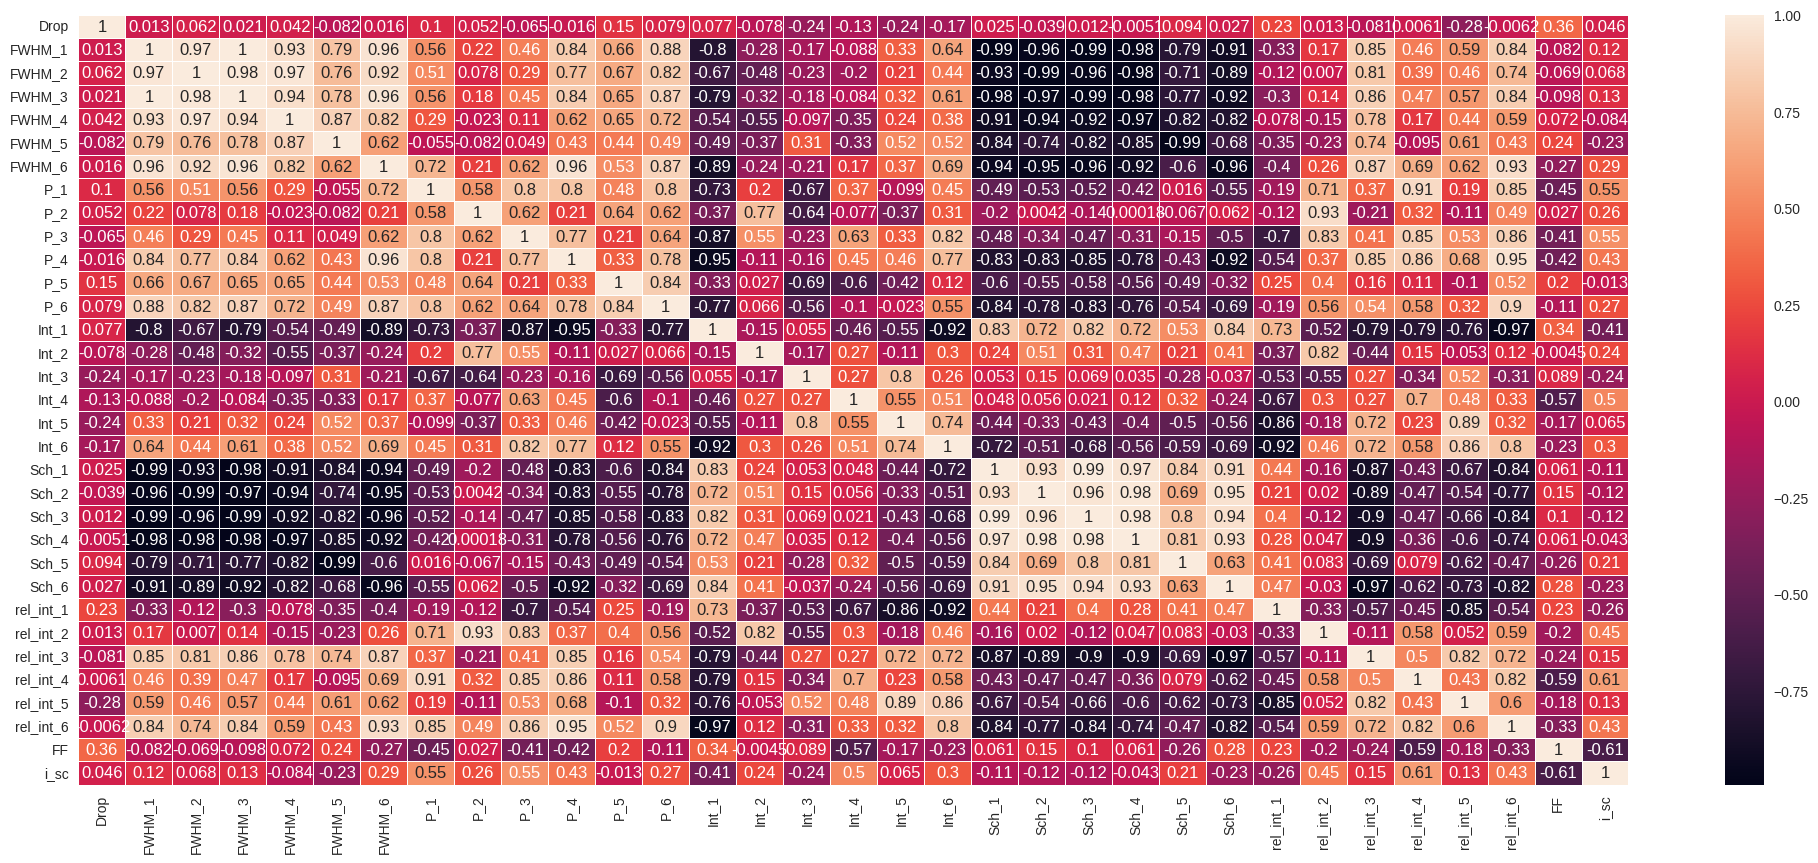

In [18]:
#correlation between features and targets
plt.subplots(figsize=(25, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.7)
plt.show()

#PyCaret

In [ ]:
!pip install pycaret[full]

In [ ]:
!pip install shap

**Features**
Drop,
FWHM 1_6,
Position 1_6,
rel_int 1_6,
Int 1_6

---
**Target**
FF


---
**Remove multicollinearty**

In [177]:
from pycaret.regression import *
s = setup(data, target = 'FF',  train_size = 0.8, session_id = 5802 ,fold=3,remove_multicollinearity = True, multicollinearity_threshold= 0.9,
          ignore_features=['i_sc','Sch_1', 'Sch_2', 'Sch_3', 'Sch_4', 'Sch_5','Sch_6'])

,Description,Value
0,Session id,5802
1,Target,FF
2,Target type,Regression
3,Original data shape,"(27, 33)"
4,Transformed data shape,"(27, 17)"
5,Transformed train set shape,"(21, 17)"
6,Transformed test set shape,"(6, 17)"
7,Ignore features,7
8,Numeric features,25
9,Preprocess,True


In [178]:
best = compare_models(cross_validation= False)
#When cross_validation=False, metrics are evaluated on holdout set.

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,0.5686,0.4431,0.6656,0.8525,0.0147,0.0129,0.1000
rf,Random Forest Regressor,0.7005,0.7225,0.8500,0.7595,0.0185,0.0157,0.3000
catboost,CatBoost Regressor,0.6518,0.9410,0.9701,0.6867,0.0211,0.0145,0.3500
gbr,Gradient Boosting Regressor,0.8930,1.0327,1.0162,0.6562,0.0222,0.0202,0.0800
et,Extra Trees Regressor,1.0085,1.2362,1.1118,0.5885,0.0242,0.0226,0.1600
xgboost,Extreme Gradient Boosting,1.0374,1.5122,1.2297,0.4966,0.0272,0.0238,0.0700
knn,K Neighbors Regressor,0.8611,1.5429,1.2421,0.4864,0.0276,0.0196,0.0500
huber,Huber Regressor,1.1882,1.9367,1.3916,0.3553,0.0302,0.0265,0.1100
dt,Decision Tree Regressor,1.2797,2.2084,1.4861,0.2649,0.0323,0.0291,0.0500
lr,Linear Regression,1.2207,2.4134,1.5535,0.1966,0.0339,0.0271,0.0400


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

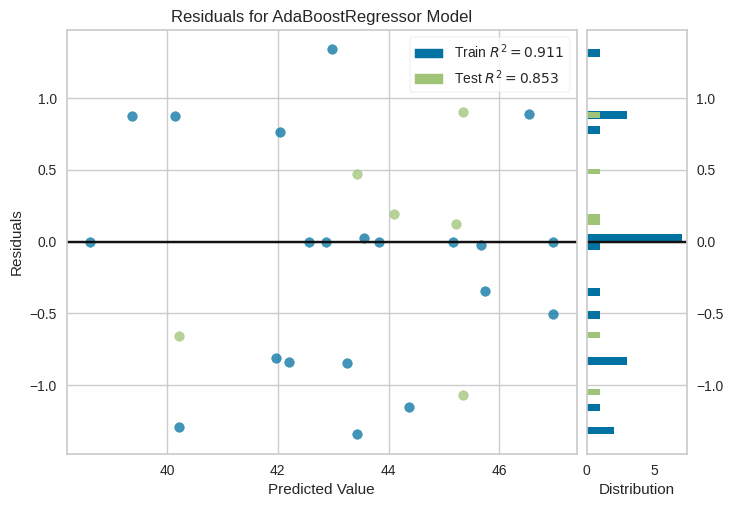

In [179]:
plot_model(best)

In [180]:
#AdaBoostRegressor
ada = create_model('ada',return_train_score=True,cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.5686,0.4431,0.6656,0.8525,0.0147,0.0129
Train,0.5682,0.5698,0.7549,0.9107,0.0173,0.0133


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

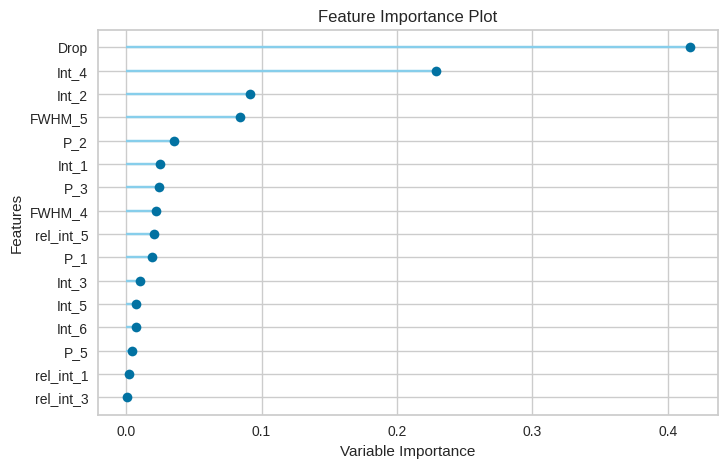

In [181]:
plot_model(ada, plot = 'feature_all')

In [182]:
rf = create_model('rf',return_train_score=True,cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.7005,0.7225,0.8500,0.7595,0.0185,0.0157
Train,0.7245,0.7549,0.8689,0.8817,0.0198,0.0169


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

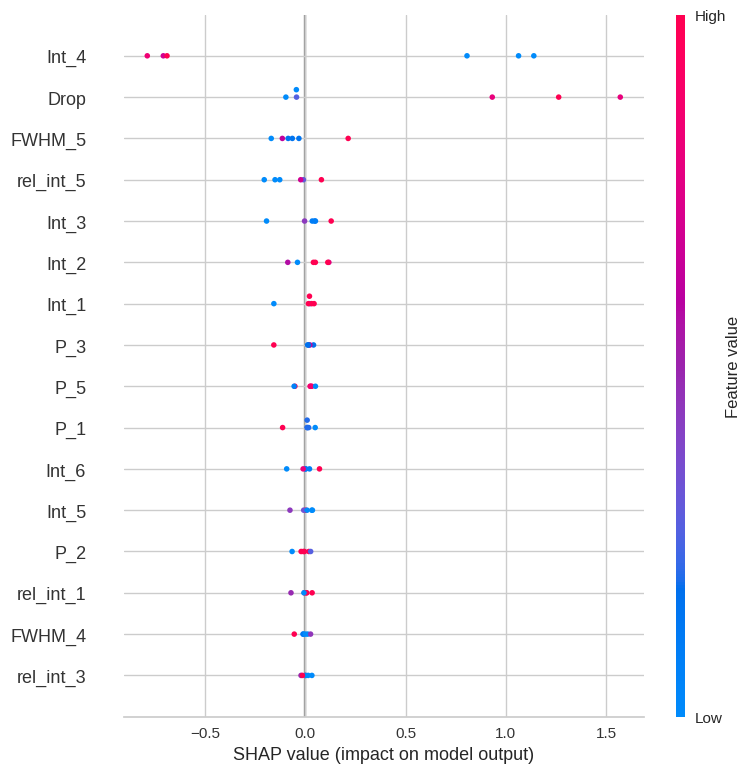

In [183]:
interpret_model(rf)

when remove_multicollinearity = True, The following features are not considered:

[rel_int_2,rel_int_4,rel_int_6,FWHM_1,FWHM_2,FWHM_3,FWHM_6,P_4,P_6]


When in pycaret, multicollinearity is removed, several features also are removed.

⚡ keep_features param can be used to always keep specific features during preprocessing



---



---



**Features**
Drop,
FWHM 1_6,
Position 1_6,
rel_int 1_6,
Int 1_6

---
**Target**
FF


In [184]:
from pycaret.regression import *
s = setup(data, target = 'FF',  train_size = 0.8,session_id = 5802,
          ignore_features=['i_sc','Sch_1', 'Sch_2', 'Sch_3', 'Sch_4', 'Sch_5','Sch_6'])

,Description,Value
0,Session id,5802
1,Target,FF
2,Target type,Regression
3,Original data shape,"(27, 33)"
4,Transformed data shape,"(27, 26)"
5,Transformed train set shape,"(21, 26)"
6,Transformed test set shape,"(6, 26)"
7,Ignore features,7
8,Numeric features,25
9,Preprocess,True


In [185]:
best = compare_models(cross_validation = False)
#When cross_validation=False, metrics are evaluated on holdout set.

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.7816,0.8084,0.8991,0.7309,0.0197,0.0176,0.1900
ada,AdaBoost Regressor,0.8275,0.9062,0.9520,0.6983,0.0209,0.0187,0.0800
catboost,CatBoost Regressor,0.7119,0.9512,0.9753,0.6834,0.0213,0.0160,0.4600
et,Extra Trees Regressor,0.9719,1.2965,1.1386,0.5684,0.0248,0.0217,0.1300
knn,K Neighbors Regressor,0.7841,1.3267,1.1518,0.5583,0.0254,0.0177,0.0200
gbr,Gradient Boosting Regressor,1.0416,1.8012,1.3421,0.4004,0.0296,0.0238,0.0600
xgboost,Extreme Gradient Boosting,1.2570,1.9489,1.3960,0.3512,0.0306,0.0285,0.0600
huber,Huber Regressor,1.2710,2.1055,1.4510,0.2991,0.0314,0.0284,0.0500
ridge,Ridge Regression,0.9779,2.3676,1.5387,0.2119,0.0341,0.0219,0.0300
lr,Linear Regression,1.2207,2.4136,1.5536,0.1965,0.0339,0.0271,0.0300


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [188]:
rf = create_model('rf',return_train_score=True,cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.7816,0.8084,0.8991,0.7309,0.0197,0.0176
Train,0.6836,0.6813,0.8254,0.8933,0.0188,0.0159


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

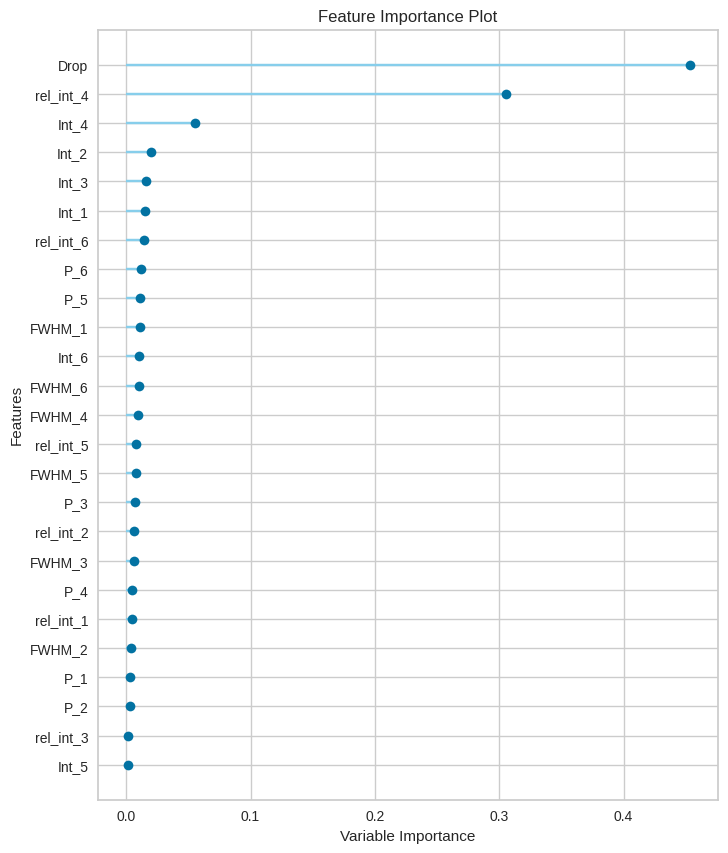

In [189]:
plot_model(rf, plot = 'feature_all')

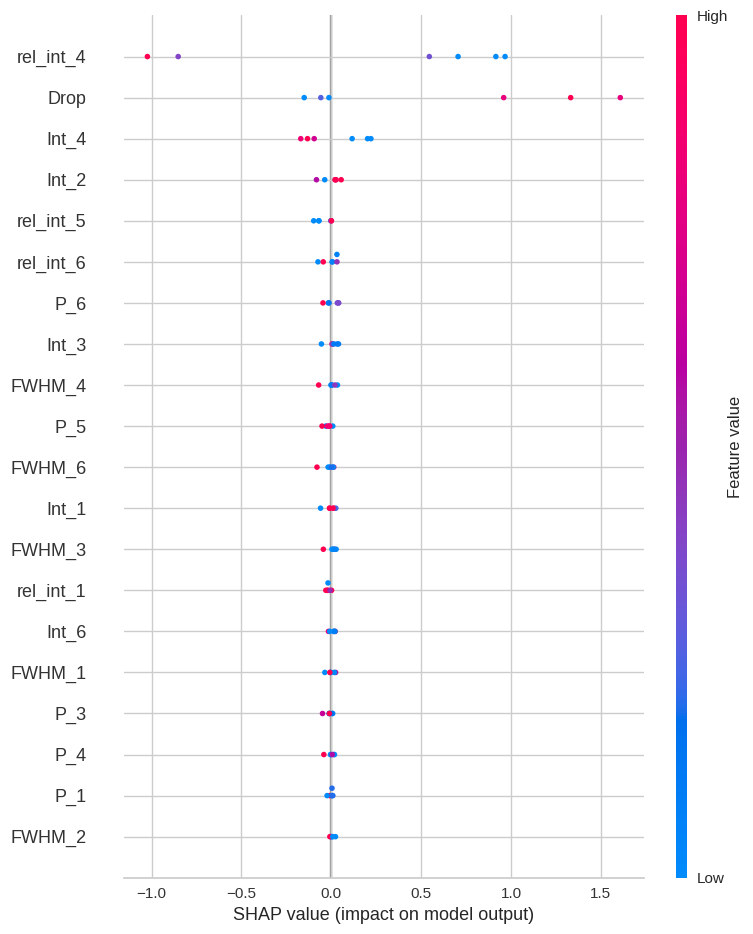

In [190]:
interpret_model(rf)



---



---



**Features**
Drop,
FWHM 1_6,
Position 1_6,
rel_int 1_6,
Int 1_6

---
**Target**
FF


---
**Ordinal_feature**
Drop

In [191]:
from pycaret.regression import *
s = setup(data, target = 'FF',  train_size = 0.8, session_id = 5802 ,fold=3,
          ignore_features=['i_sc','Sch_1', 'Sch_2', 'Sch_3', 'Sch_4', 'Sch_5','Sch_6'],ordinal_features= { 'Drop' : [1,2,3,4,5,6] })

,Description,Value
0,Session id,5802
1,Target,FF
2,Target type,Regression
3,Original data shape,"(27, 33)"
4,Transformed data shape,"(27, 26)"
5,Transformed train set shape,"(21, 26)"
6,Transformed test set shape,"(6, 26)"
7,Ignore features,7
8,Ordinal features,1
9,Numeric features,25


In [192]:
best = compare_models(cross_validation= False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.7816,0.8084,0.8991,0.7309,0.0197,0.0176,0.2300
ada,AdaBoost Regressor,0.8275,0.9062,0.9520,0.6983,0.0209,0.0187,0.1000
catboost,CatBoost Regressor,0.7119,0.9512,0.9753,0.6834,0.0213,0.0160,0.4500
et,Extra Trees Regressor,0.9719,1.2965,1.1386,0.5684,0.0248,0.0217,0.1700
knn,K Neighbors Regressor,0.7841,1.3267,1.1518,0.5583,0.0254,0.0177,0.0400
gbr,Gradient Boosting Regressor,1.0416,1.8012,1.3421,0.4004,0.0296,0.0238,0.0800
xgboost,Extreme Gradient Boosting,1.2570,1.9489,1.3960,0.3512,0.0306,0.0285,0.0800
huber,Huber Regressor,1.2393,2.0744,1.4403,0.3094,0.0311,0.0276,0.0600
ridge,Ridge Regression,0.9779,2.3676,1.5387,0.2119,0.0341,0.0219,0.0600
lr,Linear Regression,1.2207,2.4135,1.5536,0.1966,0.0339,0.0271,0.0600


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [193]:
rf = create_model('rf',cross_validation = False,return_train_score=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.7816,0.8084,0.8991,0.7309,0.0197,0.0176
Train,0.6836,0.6813,0.8254,0.8933,0.0188,0.0159


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Features**
Drop,
FWHM 1_6,
Position 1_6,
rel_int 1_6,
Int 1_6
Sch 1_6

---
**Target**
i_sc

In [196]:
from pycaret.regression import *
s = setup(data, target = 'i_sc',  train_size = 0.8,fold=5,session_id = 1102, ignore_features=['FF'])

,Description,Value
0,Session id,1102
1,Target,i_sc
2,Target type,Regression
3,Original data shape,"(27, 33)"
4,Transformed data shape,"(27, 32)"
5,Transformed train set shape,"(21, 32)"
6,Transformed test set shape,"(6, 32)"
7,Ignore features,1
8,Numeric features,31
9,Preprocess,True


In [197]:
best = compare_models(cross_validation = False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,6.1792,79.3274,8.9066,0.8410,0.0239,0.0166,0.0800
rf,Random Forest Regressor,10.3345,140.4687,11.8519,0.7184,0.0311,0.0275,0.1900
dt,Decision Tree Regressor,11.4167,214.6384,14.6505,0.5697,0.0376,0.0296,0.0200
et,Extra Trees Regressor,13.7948,242.5541,15.5741,0.5138,0.0405,0.0365,0.1300
gbr,Gradient Boosting Regressor,13.4723,242.7003,15.5788,0.5135,0.0408,0.0357,0.0600
lasso,Lasso Regression,14.3584,264.0145,16.2485,0.4707,0.0426,0.0383,0.0200
llar,Lasso Least Angle Regression,14.3600,264.0954,16.2510,0.4706,0.0426,0.0383,0.0200
en,Elastic Net,14.6339,266.4712,16.3239,0.4658,0.0427,0.0389,0.0300
xgboost,Extreme Gradient Boosting,14.8158,271.6008,16.4803,0.4555,0.0441,0.0402,0.0600
ridge,Ridge Regression,14.2661,274.1365,16.5571,0.4505,0.0435,0.0381,0.0200


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [198]:
ada = create_model('ada',return_train_score=True,cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,6.1792,79.3274,8.9066,0.8410,0.0239,0.0166
Train,5.9269,56.8643,7.5408,0.8782,0.0207,0.0162


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

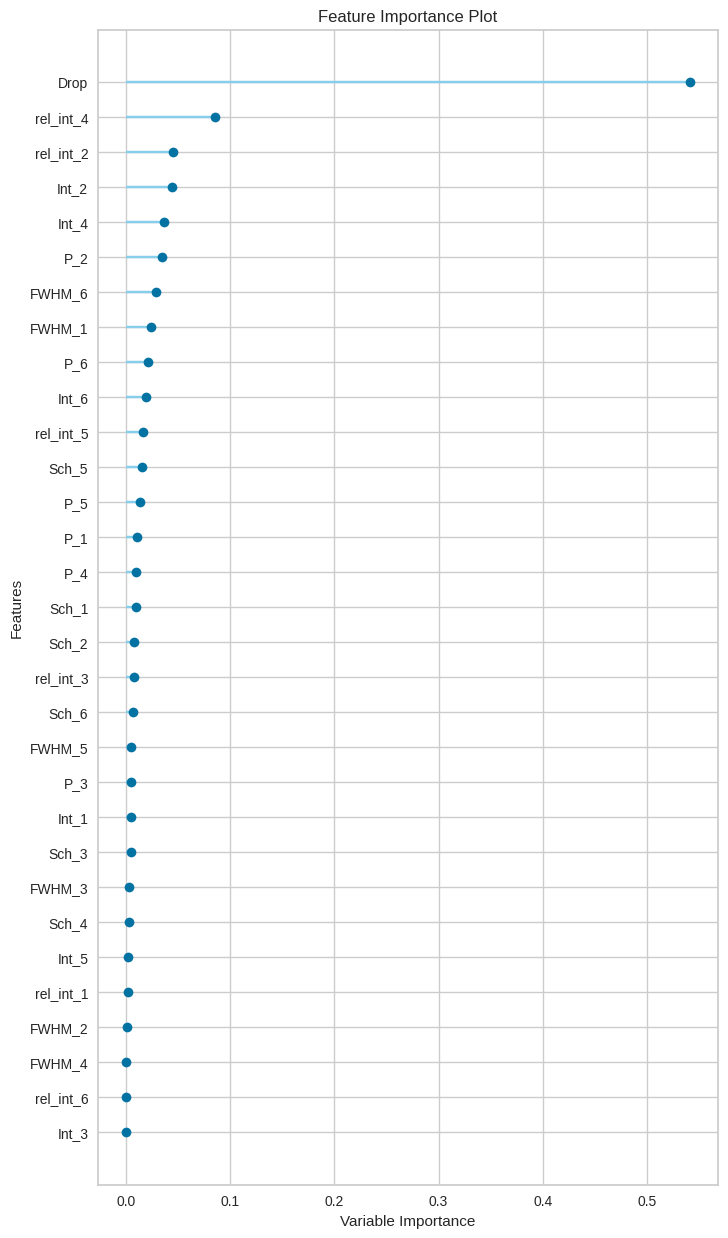

In [199]:
plot_model(ada, plot = 'feature_all')